# **IBM EMPLOYEE ATTRITION ANALYSIS AND PREDICTION**

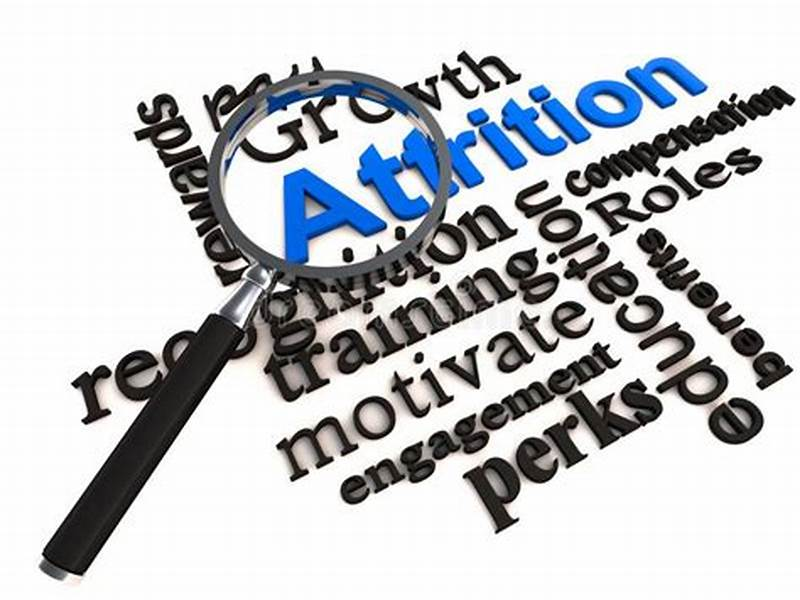

In [1]:
from IPython.display import Image
Image(filename='Images\Attrition.jpg', width=500, height=500)


<a id="cont"></a>
# Table of content

<a href=#one>1. Objectives</a> 

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Data Collection</a>

<a href=#four>4. Exploratory data Analysis</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. modeling</a>

<a href=#seven>7. Model review</a>

<a href=#eight>8. Predicting on Test data</a>

# 1. OBJECTIVES
<a id="one"></a>
<a href=#cont>Back to Table of Contents</a>

In the dynamic landscape of modern businesses, the departure of employees, known as attrition, presents both challenges and opportunities for organizations. The reasons behind employee attrition are diverse, ranging from tangible factors like unsatisfactory pay and poor workplace conditions to intangible ones such as personal circumstances like illness, loss, and relocation. Understanding and mitigating attrition is a critical endeavor for companies striving to cultivate a motivated, productive, and cohesive workforce.

In my ambitious undertaking, I delve into the realm of human resources analytics to explore the multifaceted nature of employee attrition. Leveraging the rich and comprehensive IBM data, I embarked on a transformative journey of insight discovery and prediction. 

My aim is twofold: 
- to gain a profound understanding of the underlying factors that contribute to attrition within organizations.
-  to develop a powerful predictive model capable of forecasting attrition patterns with remarkable accuracy.

# 2. IMPORTING LIBRARIES
<a id="two"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
#libraries for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#libraries for feature engineering and modeling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE

# 3. DATA COLLECTION
<a id="three"></a>
<a href=#cont>Back to Table of Contents</a>

https://www.kaggle.com/code/rohitsahoo/ibm-employee-attrition-analysis-and-prediction/input

#**Reading the data into pandas**

In [59]:
df=pd.read_csv('train.csv')
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1053   57          0      Travel_Rarely        405  Research & Development   
1054   49          0      Travel_Rarely       1490  Research & Development   
1055   34          0  Travel_Frequently        829  Research & Development   
1056   28          1  Travel_Frequently       1496                   Sales   
1057   29          1  Travel_Frequently        115                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0                    1          2     Life Sciences              1   
1                    8          1     Life Sciences              1   
2                    2          2             Other              1   
3                    3          4     Life Sciences              1   
4                    2          1           Medical              1   
...                ...        ...               ...            ...   
1053                 1          2     Life Sciences              1   
1054                 7          4     Life Sciences              1   
1055                15          3           Medical              1   
1056                 1          3  Technical Degree              1   
1057                13          3  Technical Degree              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1053            1483  ...                         1            80   
1054            1484  ...                         2            80   
1055            1485  ...                         4            80   
1056            1486  ...                         4            80   
1057            1487  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1053                 1                 13                      2   
1054                 2                 29                      3   
1055                 2                 16                      3   
1056                 1                  5                      3   
1057                 0                  7                      4   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1053               2              12                  9   
1054               3               8                  7   
1055               2              14               

**DATA DICTIONARY**

In [4]:
#Education
Education={1:'Below College', 2:'College',  3:'Bachelor', 4:'Master', 5:'Doctor'}
#Environment Satisfaction
EnvironmentSatisfaction={1:'Low', 2:'Medium', 2:'High', 3:'Very High'}
#Job Involvement
JobInvolvement={1:'Low', 2:'Medium', 3: 'High', 4 :'Very High'}
#Job Satisfaction
JobSatisfaction={1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
#Performance Rating
PerformanceRating={1:'Low', 2:'Good', 3: 'Excellent', 4: 'Outstanding'}
#Relationship Satisfaction
RelationshipSatisfaction= {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
#Work LifeBalance
WorkLifeBalance= {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}
#Attrition
Attrition={0:"No", 1: "Yes"}

# **PREPROCESSING**

**DATASET SUMMARY**

In [5]:
print("")
print("Information about our data")
print("")
print(df.info())
print("")
print("Colummns with Null values")
print("")
print(df.isnull().sum()[df.isnull().sum()>0])



Information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 


**Observation**

- The dataframe consists of 34 features with datatypes  either integers or objects.
- Every features has 1058 observations (i.e.there is no sign for null values.).

# 4. EXPLORATORY DATA ANALYSIS 
<a id="four"></a>
<a href=#cont>Back to Table of Contents</a>

**4.1. HOW MANY EMPLOYEES ENCOUNTERD ATTRITION IN IBM?**

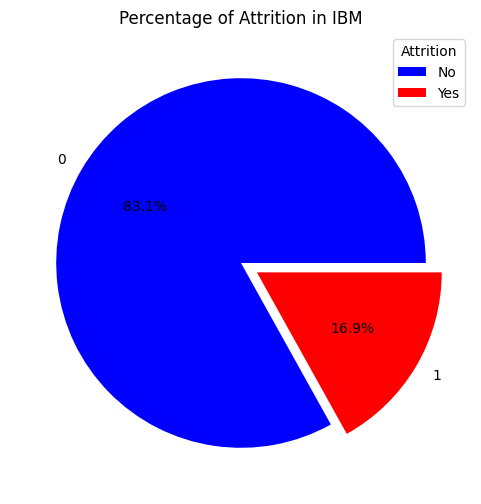

In [6]:
# A dataframe with value counts of Attrition
Attrition = pd.Series(df['Attrition'].value_counts())

# Creating a DataFrame for the pie chart
attrition_df = pd.DataFrame({'Count': Attrition.values}, index=Attrition.index)

# Define the colors and explode for the pie chart
colors = ['blue', 'red']
explode = (0, 0.1)

# plotting pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set_palette(colors)
plt.pie(attrition_df['Count'], labels=attrition_df.index, autopct="%0.1f%%", explode=explode, radius=1)
plt.title("Percentage of Attrition in IBM")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** 

- Out of 1058 employees, 16.9%  of the employees left IBM.  Employees leave for various reasons and some factors that contribute to attrition are analysed below. 
- The data imbalance will be solved by resampling in order to ensure that the model predict both classes with high accuracy.

**4.2. IS ATTRITION DEPENDENT ON AGE?**

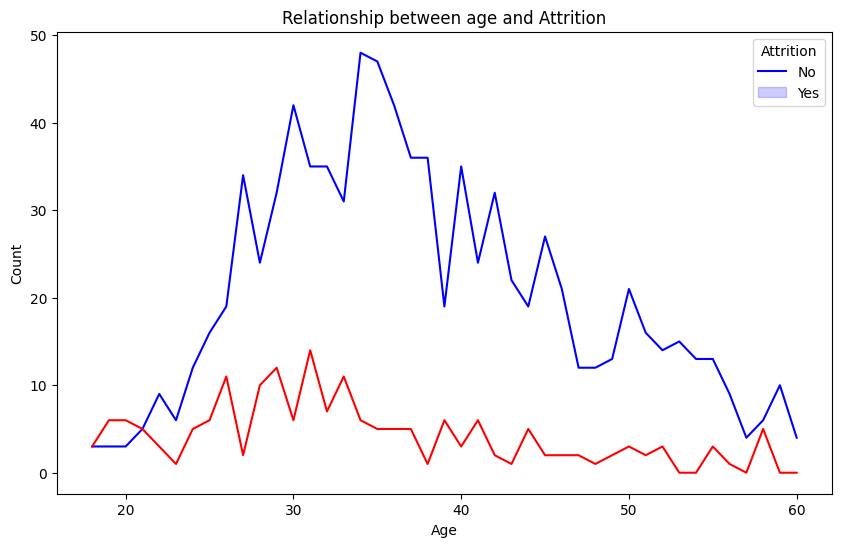

In [7]:
# Crosstab of Age
Data = pd.crosstab(index=df['Age'].replace('Age'), columns=df['Attrition'], normalize=False)

# Reseting the index to use 'Age' as a column for plotting
Data = Data.reset_index()

# Creating the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])
sns.lineplot(x='Age', y=0, data=Data, color='blue', label='No')
sns.lineplot(x='Age', y=1, data=Data, color='red', label='Yes')

plt.ylabel('Count')
plt.xlabel('Age')
plt.title("Relationship between age and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation:**

-  Most employees who leaves IBM are on their late twenties and early thirties. In their late twenties and early thirties, many employees are in a stage of their careers where they seek rapid growth and advancement. Moreover, Younger employees often prioritize skill development and continuous learning to enhance their marketability and expertise.

**4.3 DOES TRAINING INFLUENCE ATTRITION?**

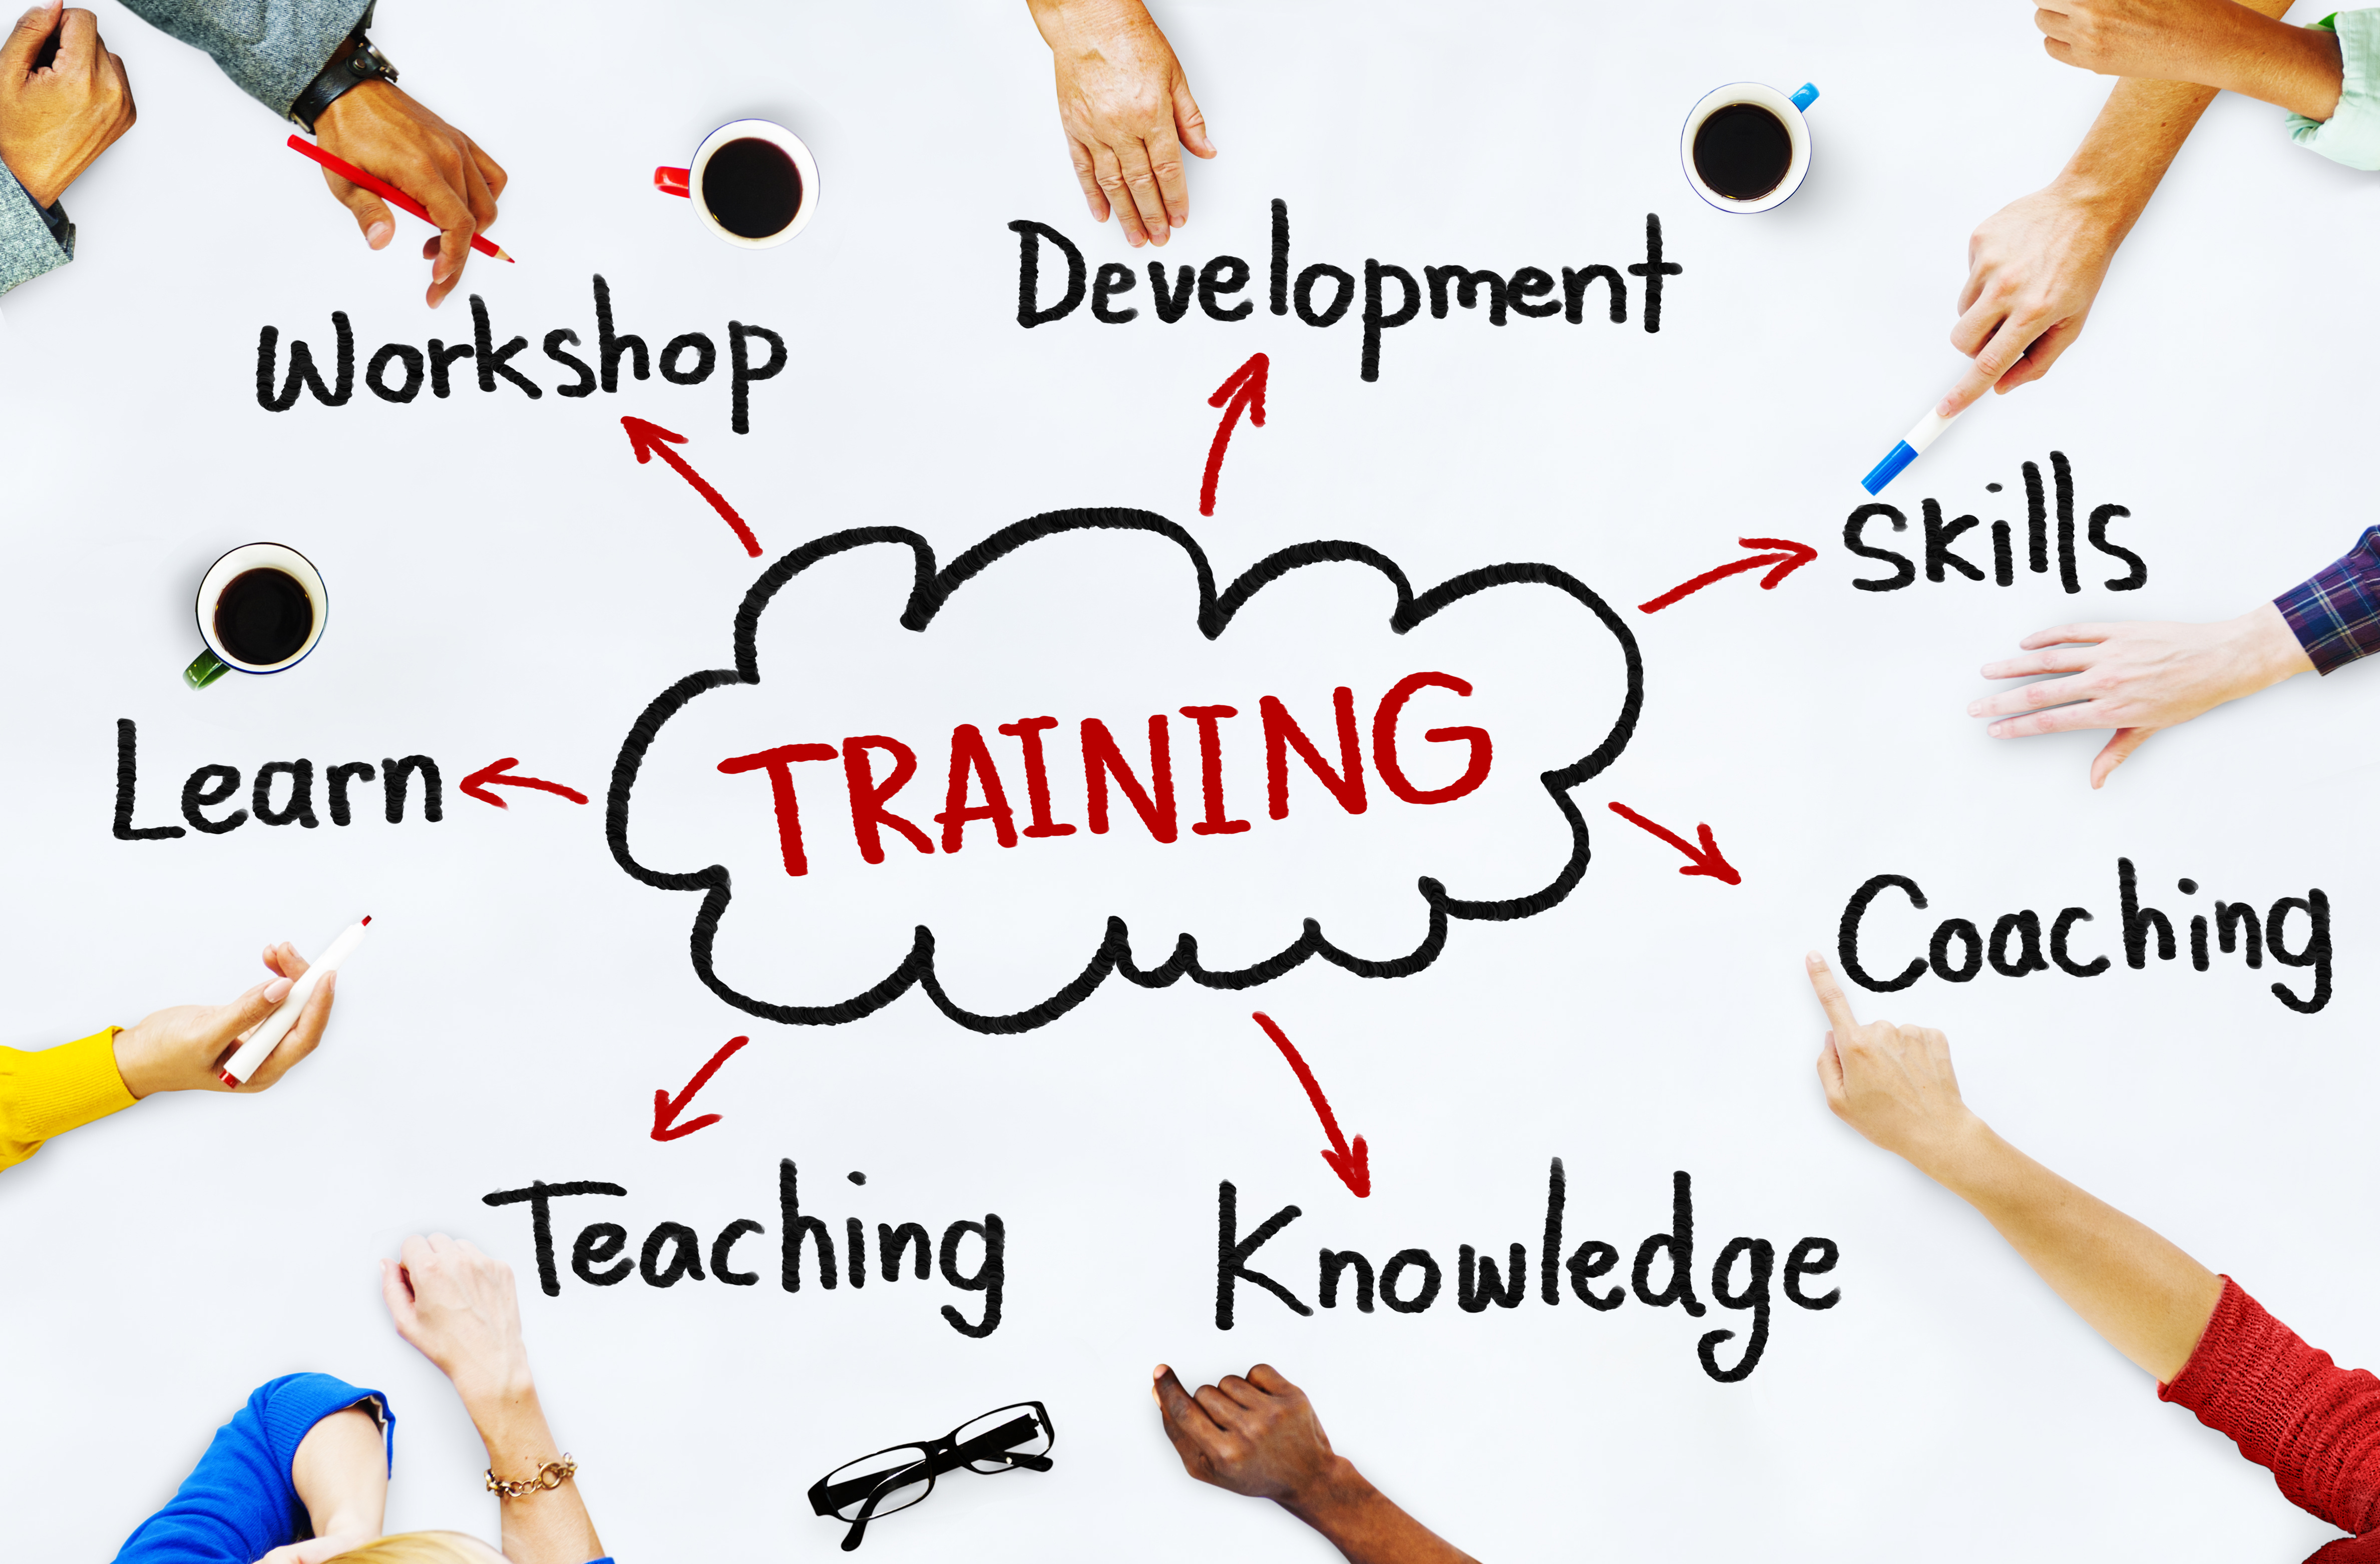

In [8]:
from IPython.display import Image
Image(filename= 'Images\Training.jpg', width=1000, height=1000)

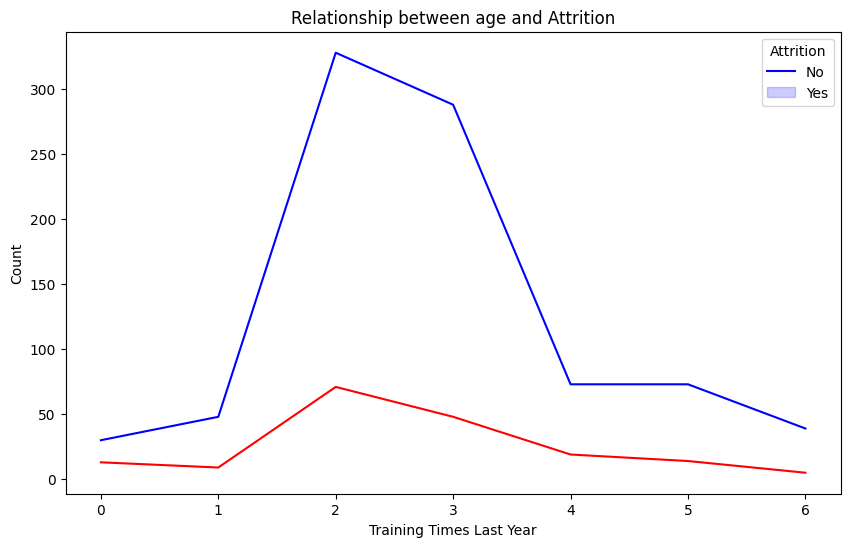

In [9]:
# A crosstab of Training time last year
Data = pd.crosstab(index=df['TrainingTimesLastYear'].replace('TrainingTimesLastYear'), columns=df['Attrition'], normalize=False)

# Reseting the index to use 'Age' as a column for plotting
Data = Data.reset_index()

# Creating the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])
sns.lineplot(x='TrainingTimesLastYear', y=0, data=Data, color='blue', label='No')
sns.lineplot(x='TrainingTimesLastYear', y=1, data=Data, color='red', label='Yes')

plt.ylabel('Count')
plt.xlabel('Training Times Last Year')
plt.title("Relationship between age and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation**

- Employees who don't have more training are prone to leave the company. Training programs provide employees with the opportunity to learn new skills and enhance their existing ones. Without adequate training, employees might feel stagnant in their roles, hindering their professional growth and reducing their job satisfaction.

**4.4. IS ATTRITION DEPENDENT ON INCOME?**  

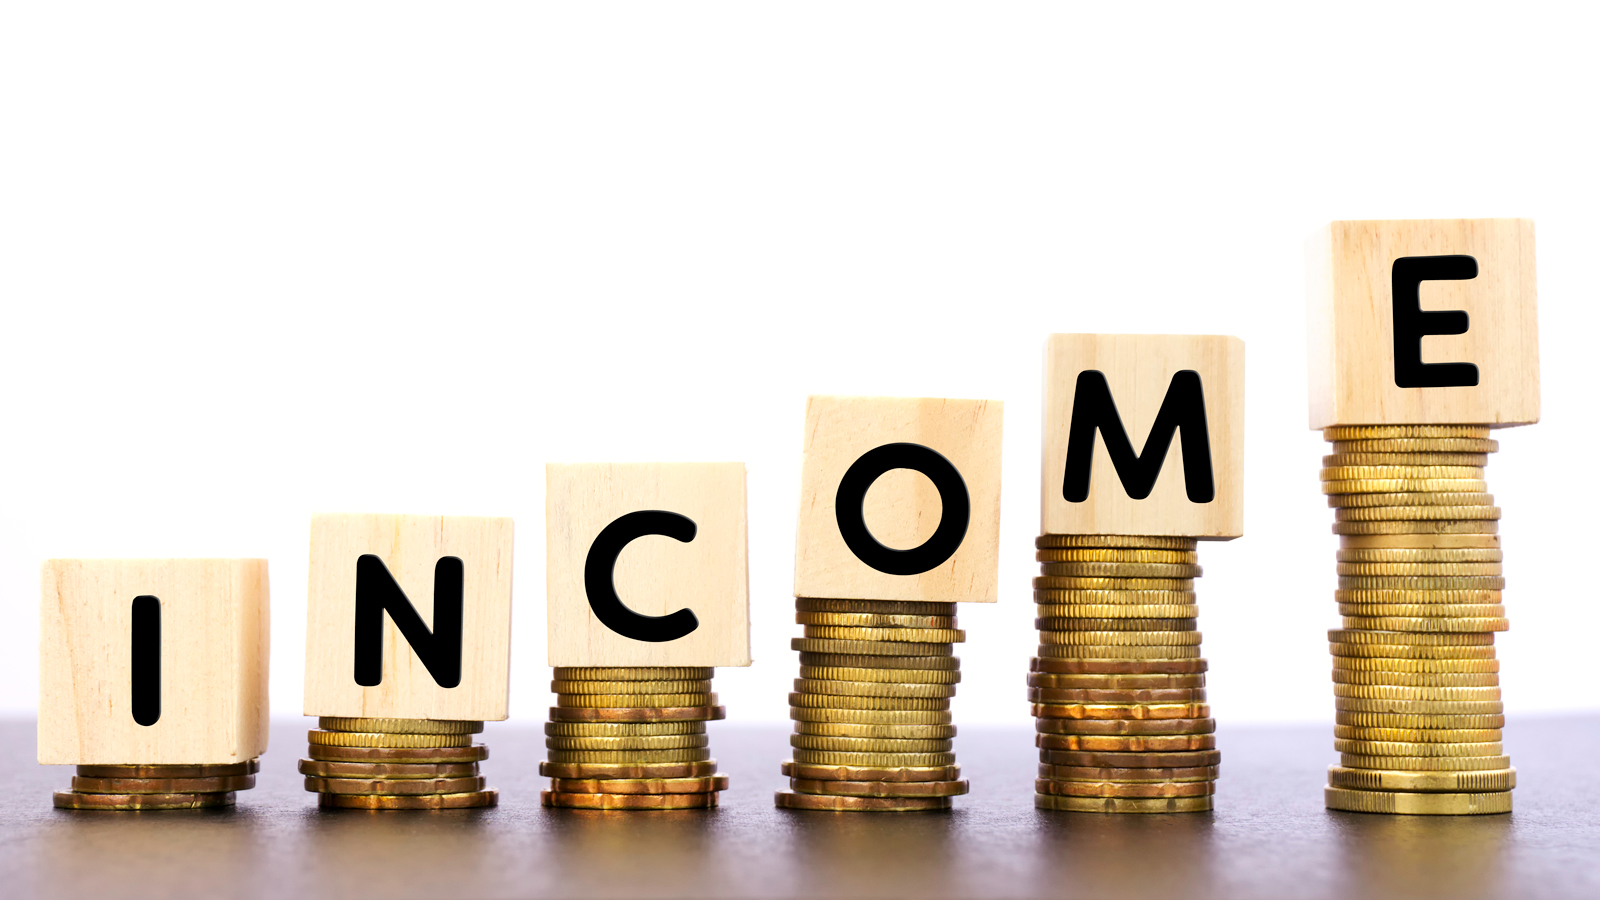

In [10]:
from IPython.display import Image
Image(filename='Images\Income.jpg', width=1000, height=1000)

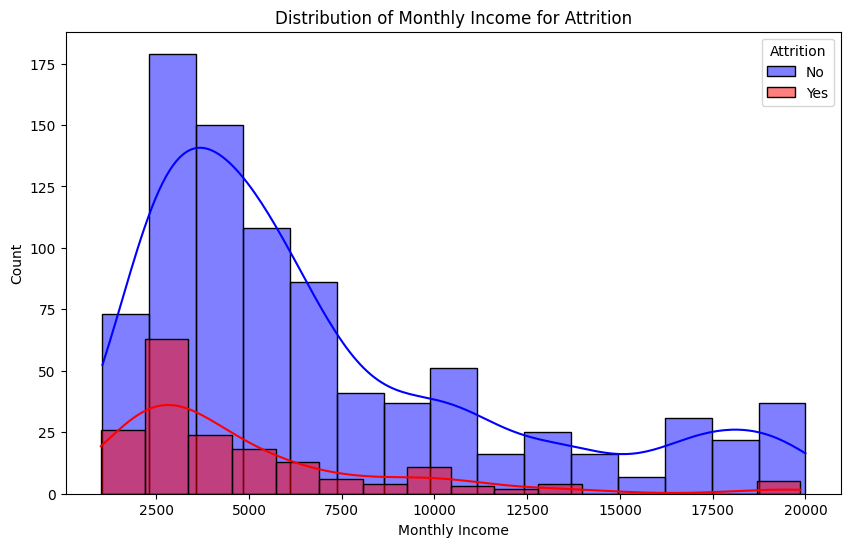

In [11]:
# Masking the dataframe
Yes = df[df["Attrition"] == 1]
No = df[df["Attrition"] == 0]

# Creating histograms using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=No, x="MonthlyIncome", color='blue', alpha=0.5, label='No', kde=True)
sns.histplot(data=Yes, x="MonthlyIncome", color='red', alpha=0.5, label='Yes', kde=True)

# Labeling axis and adding title
plt.xlabel('Monthly Income')
plt.title("Distribution of Monthly Income for Attrition")
plt.legend(loc='upper right', title="Attrition")

plt.show()

**Observation** 

- The graph above illustrates that employees who earn less income are prone to leave the company in search for greener pastures compared to those who earn more money. Employees with lower incomes may face greater financial pressures, such as paying bills, supporting their families, or dealing with debt. They may be more inclined to explore higher-paying job opportunities to improve their financial situation. Higher income often correlates with greater job satisfaction, as it can lead to a sense of financial security and recognition for one's contributions. 

**4.5. IS ATTRITION DEPENDANT ON PERFORMANCE RATING?**

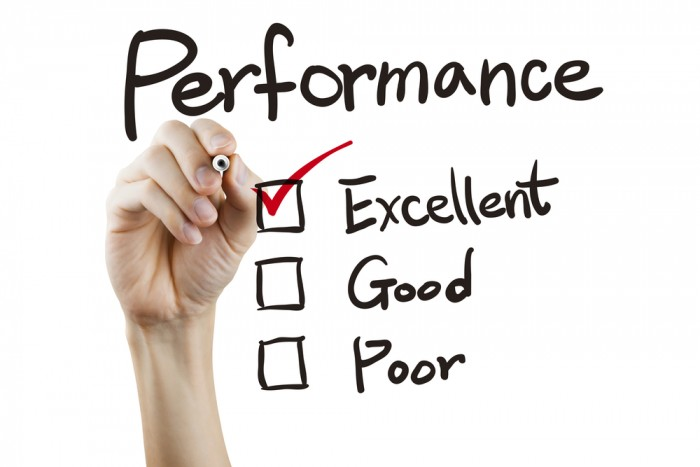

In [12]:
from IPython.display import Image
Image(filename='Images\performance.jpg', width=500, height=500)

C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\283518552.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Data_pivot, x='PerformanceRating', y=0, color='blue', label='No',  ci=None)
C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\283518552.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Data_pivot, x='PerformanceRating', y=1, color='red', label='Yes', ci=None)


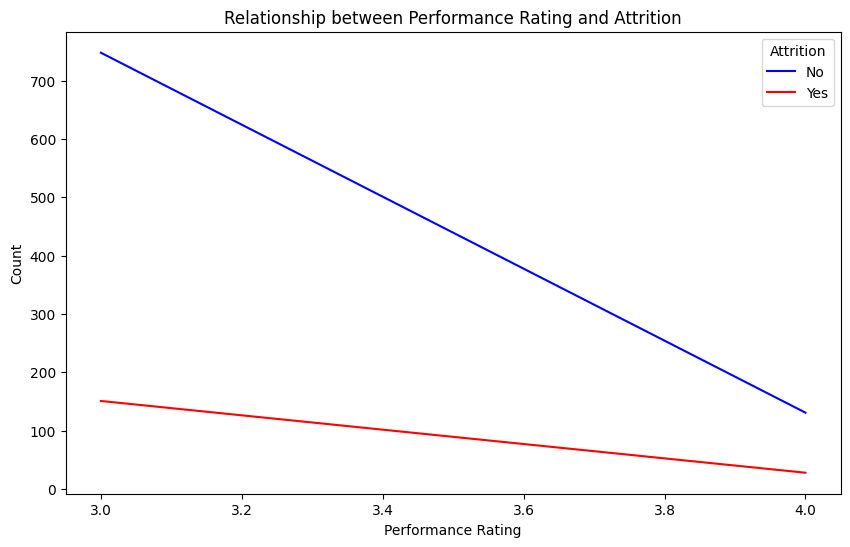

In [13]:

# Crosstab of Performance rating
Data = pd.crosstab(index=df['PerformanceRating'].replace('PerformanceRating'), columns=df['Attrition'], normalize=False)

# Reseting the index to use 'NumCompaniesWorked' as a column for plotting
Data = Data.reset_index()

# Pivoting the data to have 'Yes' and 'No' as separate columns
Data_pivot = Data.pivot_table(index='PerformanceRating', values=[1, 0], fill_value=0)

# Plotting the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specifying the palette to ensure the correct colors in the legend
sns.lineplot(data=Data_pivot, x='PerformanceRating', y=0, color='blue', label='No',  ci=None)
sns.lineplot(data=Data_pivot, x='PerformanceRating', y=1, color='red', label='Yes', ci=None)

plt.ylabel('Count')
plt.xlabel('Performance Rating')
plt.title("Relationship between Performance Rating and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation**

-  The data indicates that a significant number of employees have lower performance ratings. This could be due to various reasons, such as insufficient skills, lack of motivation, unclear expectations, or challenging job tasks.
- The data suggests that employees with lower performance ratings are more likely to leave the company compared to those with higher performance ratings. This trend raises the question of why lower-rated employees are more prone to attrition.
-  Employees who receive lower performance ratings might feel dissatisfied with their work or their contributions to the organization.

**4.6. DOES ATTRITION DEPEND ON THE NUMBER OF COMPANIES WORKED?**

C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\2442629655.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=0, color='blue', label='No',  ci=None)
C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\2442629655.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=1, color='red', label='Yes', ci=None)


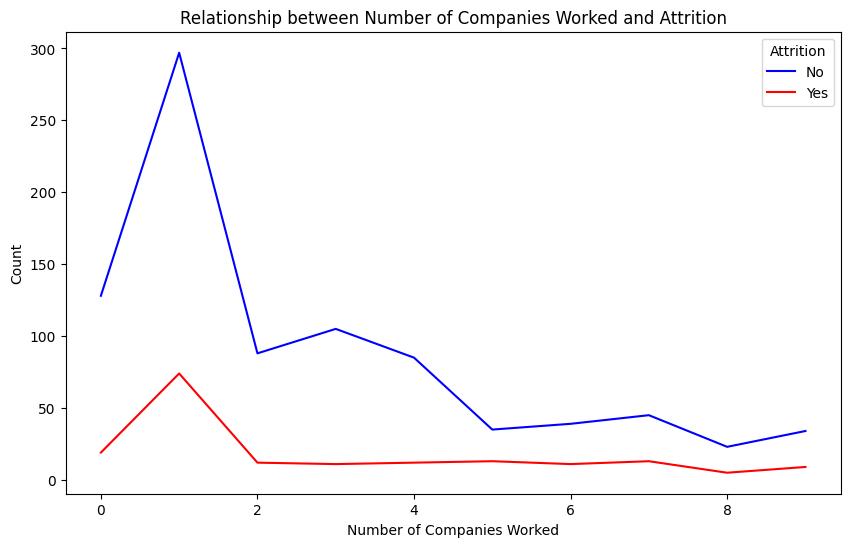

In [14]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['NumCompaniesWorked'].replace('NumCompaniesWorked'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'NumCompaniesWorked' as a column for plotting
Data = Data.reset_index()

# Pivot the data to have 'Yes' and 'No' as separate columns
Data_pivot = Data.pivot_table(index='NumCompaniesWorked', values=[1, 0], fill_value=0)

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=0, color='blue', label='No',  ci=None)
sns.lineplot(data=Data_pivot, x='NumCompaniesWorked', y=1, color='red', label='Yes', ci=None)

plt.ylabel('Count')
plt.xlabel('Number of Companies Worked')
plt.title("Relationship between Number of Companies Worked and Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** 

- Among employees with limited work experience at multiple companies, the attrition rate is higher. This means that a higher percentage of these employees choose to leave the current organization compared to their counterparts who have worked for more companies.
- Job hopping (frequent changes in employment)are more common among early-career professionals who still want to explore different work environments and industries.

**4.7. DOES JOB ROLES AFFECT ATTRITION?**

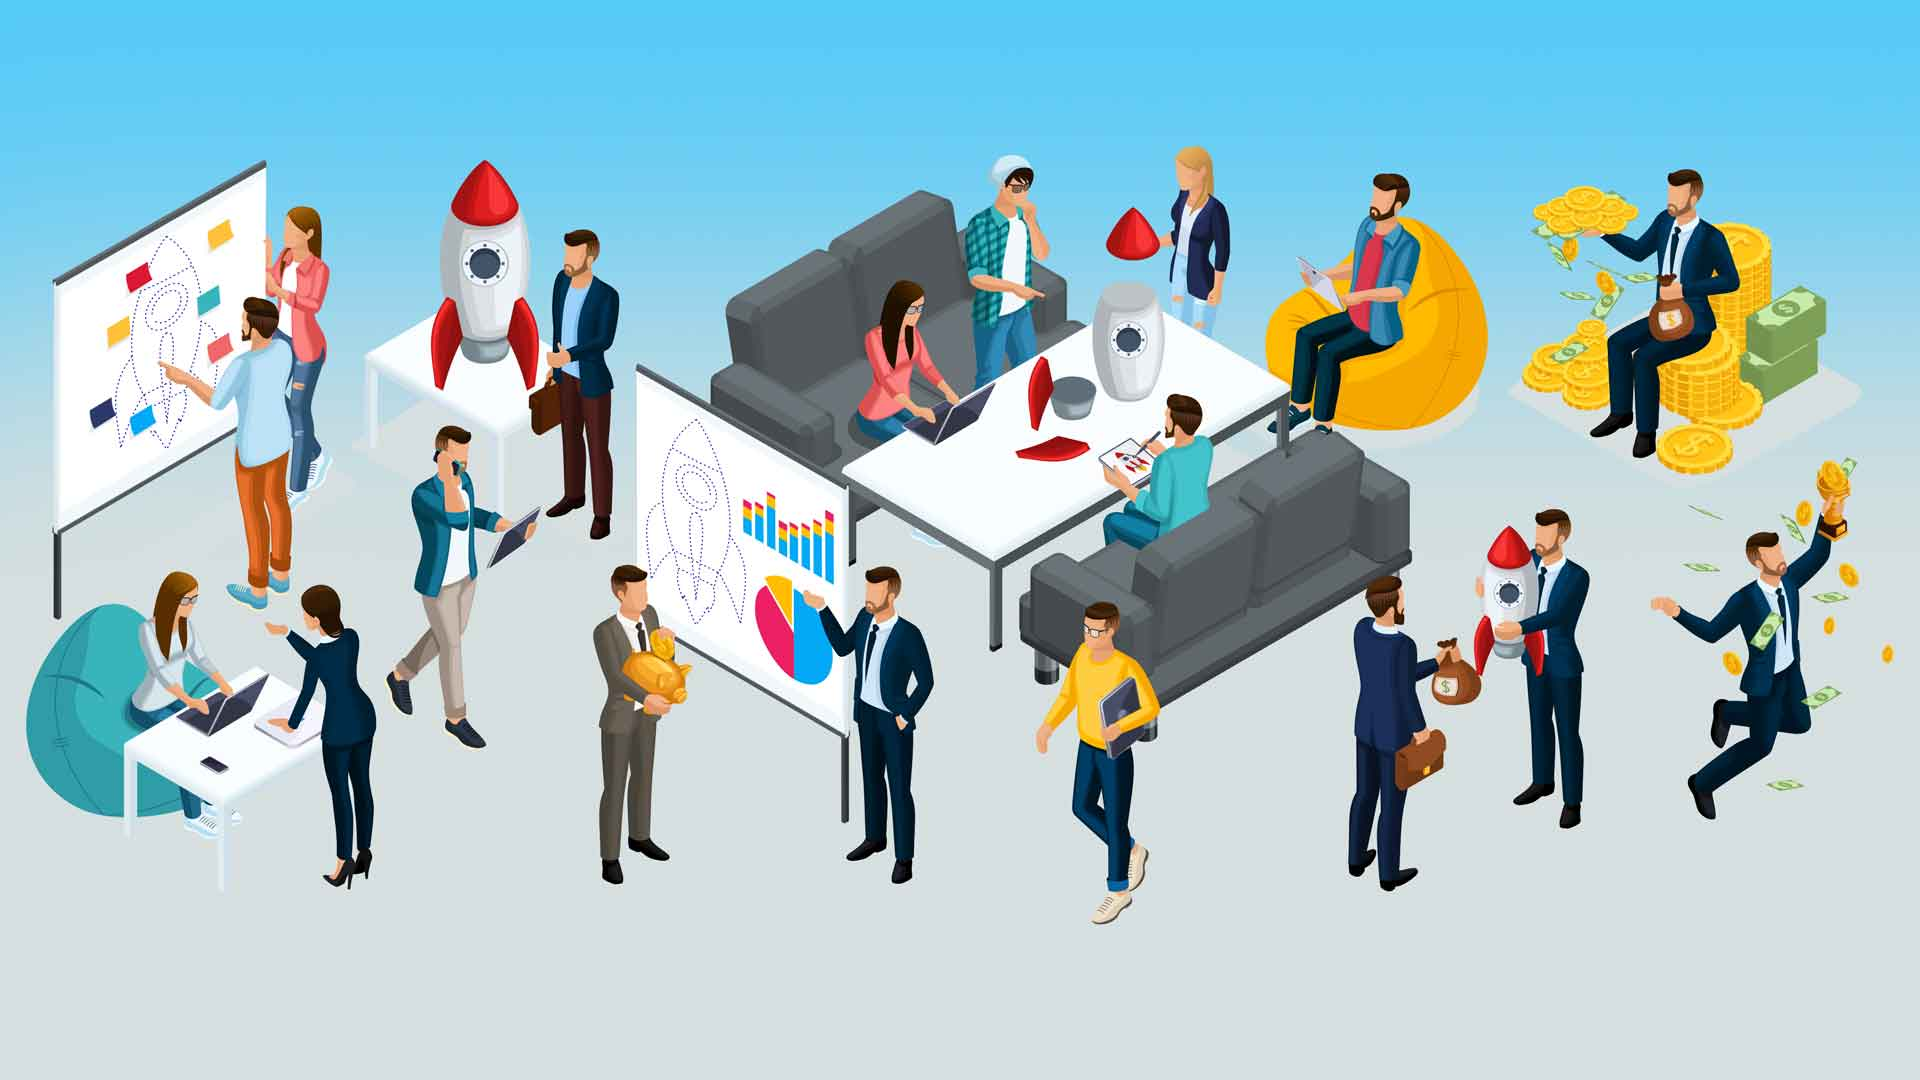

In [15]:
from IPython.display import Image
Image(filename="Images\Roles.jpg", width=1000, height=100)

C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\787177804.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobRole', y=1, data=Data, color='red', label='Yes',  ci=None)
C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\787177804.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobRole', y=0, data=Data, color='blue', label='No', bottom=Data[1],  ci=None)


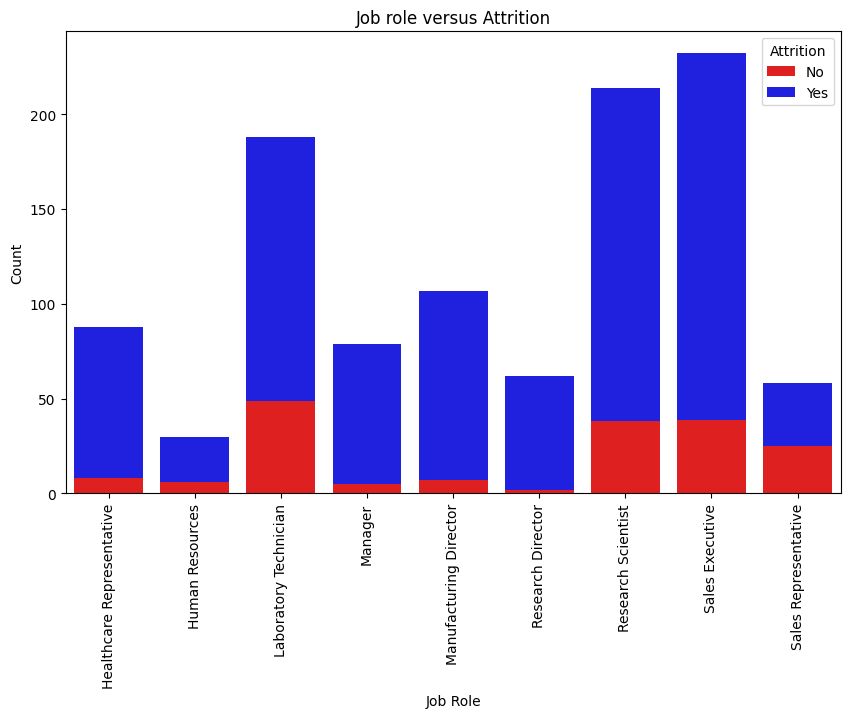

In [16]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['JobRole'].replace('JobRole'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'EducationField' as a column for plotting
Data = Data.reset_index()

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.barplot(x='JobRole', y=1, data=Data, color='red', label='Yes',  ci=None)
sns.barplot(x='JobRole', y=0, data=Data, color='blue', label='No', bottom=Data[1],  ci=None)

plt.ylabel('Count')
plt.xlabel('Job Role')
plt.title("Job role versus Attrition")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")
plt.xticks(rotation=90, ha='center')


plt.show()

**Observations**

- The data indicates that there are more employees in the job roles of Research Scientists and Sales Executives compared to Laboratory Technicians. However, despite having fewer employees, the Laboratory Technician job role has the highest attrition rate. Laboratory Technicians might perceive limited opportunities for career growth within the organization, which could motivate them to seek advancement elsewhere. It's possible that the compensation and benefits offered to Laboratory Technicians are comparatively lower than those in other job roles, prompting them to explore higher-paying opportunities elsewhere.

- It is essential to note that more than 20 Research Scientists, Sales Executives, and Sales Representatives have faced attrition. 

**4.8.DOES WORKING OVERTIME INFLUENCE ATTRITION?**

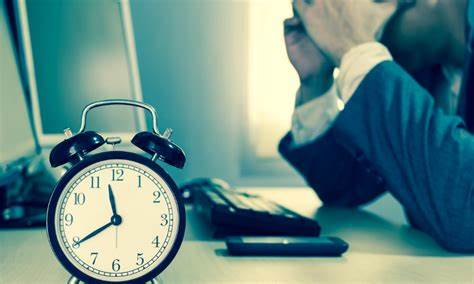

In [17]:
from IPython.display import Image
Image(filename='Images\Overtime.jpg', width=1000, height=500)

C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\2522712557.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OverTime', y=1, data=Data, color='red', label='Yes', alpha=0.7,  ci=None)
C:\Users\mapas\AppData\Local\Temp\ipykernel_32128\2522712557.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OverTime', y=0, data=Data, color='blue', label='No', alpha=0.7, bottom=Data[1],  ci=None)


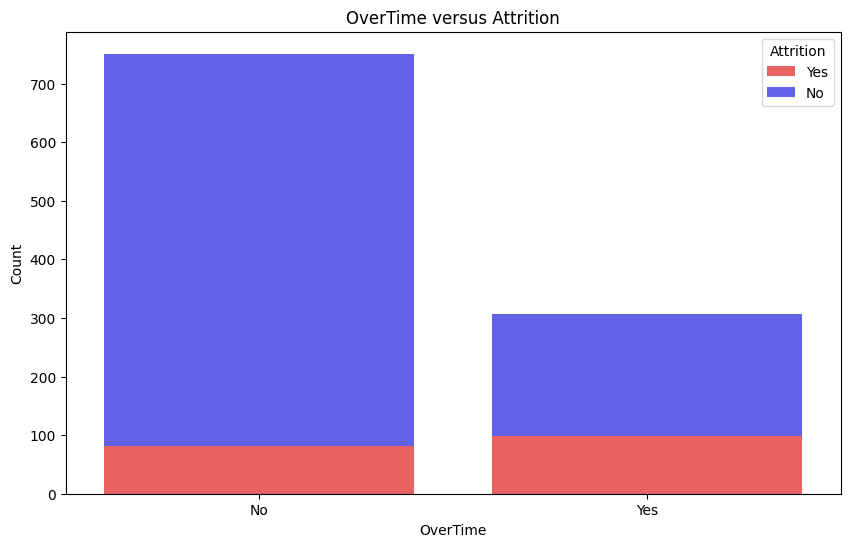

In [18]:
# Assuming you have a DataFrame named 'df'
Data = pd.crosstab(index=df['OverTime'].replace('OverTime'), columns=df['Attrition'], normalize=False)

# Reset the index to use 'BusinessTravel' as a column for plotting
Data = Data.reset_index()

# Create the stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette(['blue', 'red'])

# Specify the palette to ensure the correct colors in the legend
sns.barplot(x='OverTime', y=1, data=Data, color='red', label='Yes', alpha=0.7,  ci=None)
sns.barplot(x='OverTime', y=0, data=Data, color='blue', label='No', alpha=0.7, bottom=Data[1],  ci=None)

plt.ylabel('Count')
plt.xlabel('OverTime')
plt.title("OverTime versus Attrition")
labels = ['Yes', 'No']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation** 

- Despite the majority of employees not working overtime, the attrition rate for those who do work overtime is higher than for those who don't. This means that employees who work additional hours beyond their regular schedules are more likely to leave the organization.
- One possible explanation for the higher attrition rate among employees who work a lot of overtime is a poor work-life balance.Employees who consistently work overtime might feel overworked or underappreciated for their efforts.

# 5 FEATURE ENGINEERING
<a id="five"></a>
<a href=#cont>Back to Table of Contents</a>

**5.1 CHECKING FOR LOW AND HIGH CARDINALITY**

In [19]:
# Masking columns with one unique values
df.columns[df.nunique() == 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

- The columns 'Over 18', 'Employment', and 'Standard Hours' contain only a single unique value. These columns do not provide any variation in data and are unlikely to contribute to improving the model's performance. Therefore, these columns with be dropped

In [60]:
#Dropping the columns
df=df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

**5.2 CHECKING FOR MULTICOLINEARITY**

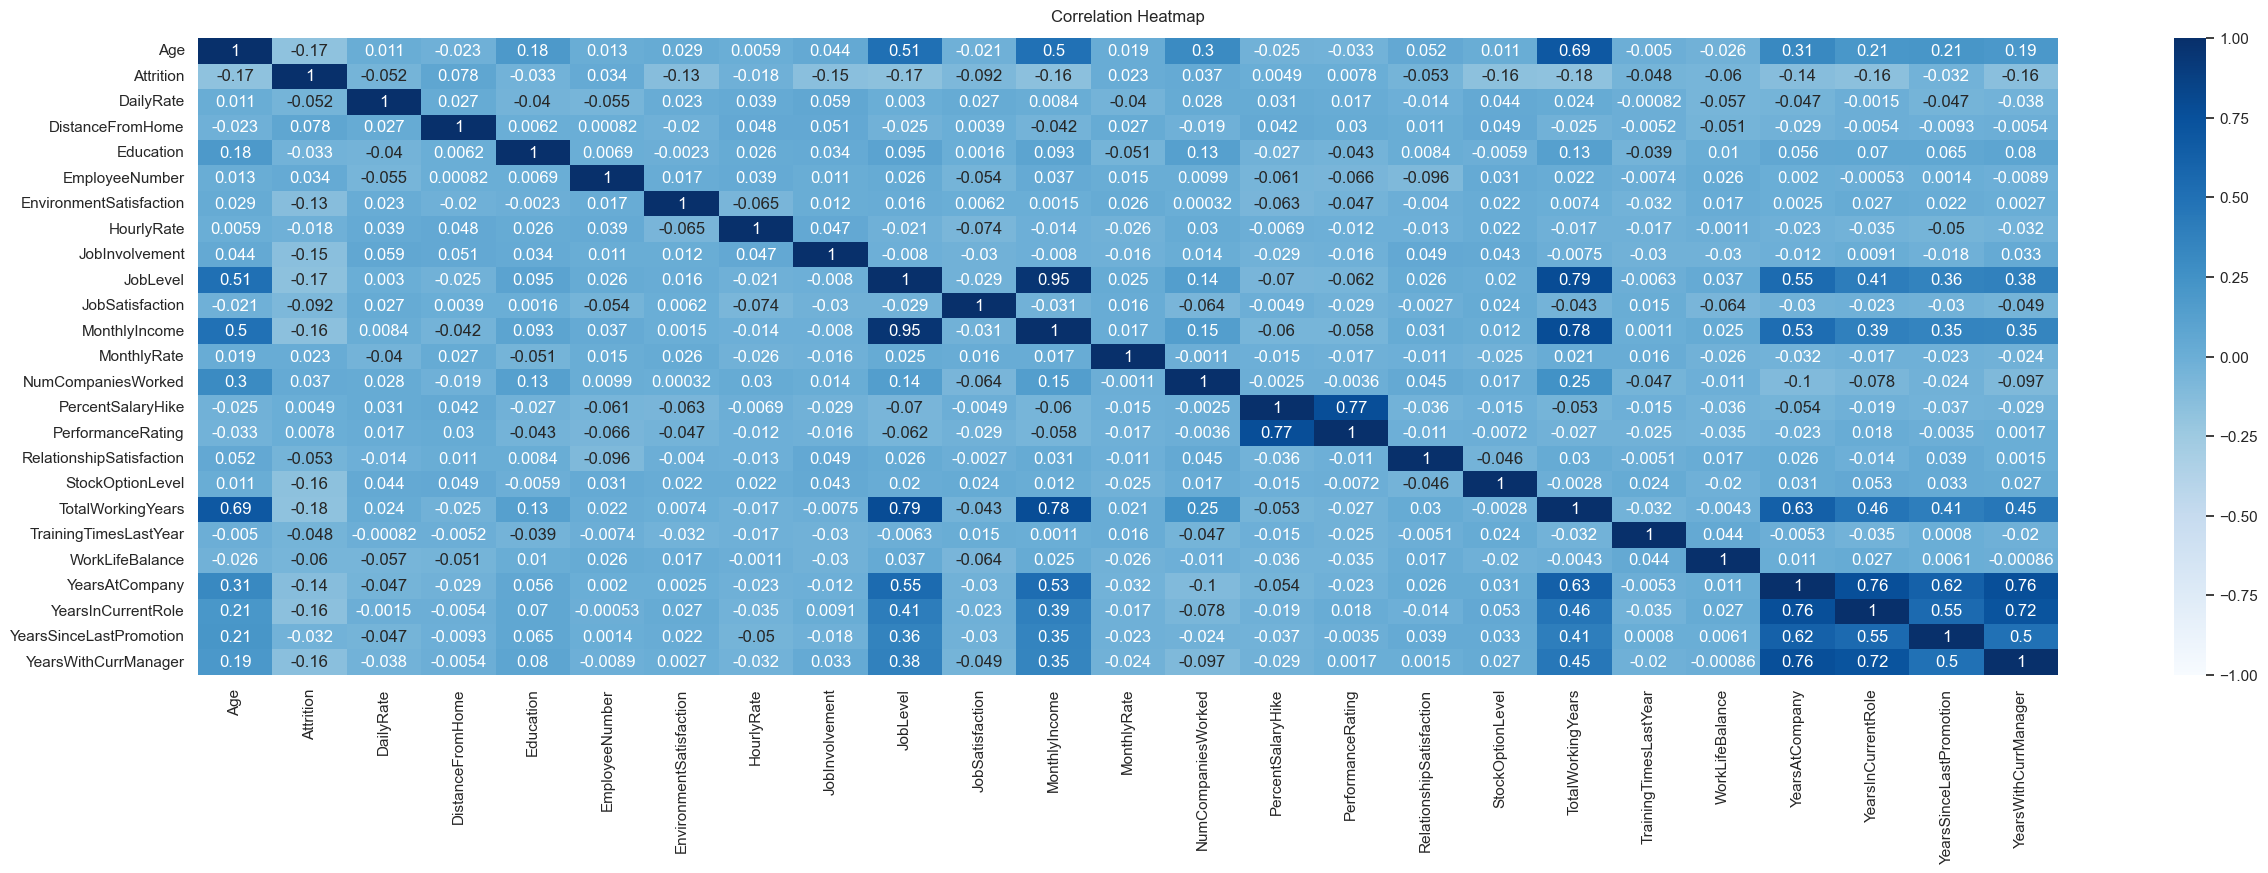

In [21]:
sns.set(rc={'figure.figsize':(30,8.27)})
num=(df.select_dtypes('number'))
heatmap=sns.heatmap(num.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observation**

- The correlation between Percent Salary Hike and and Performance Rating is 0.77. However, Performance Rating highly correlates with attrition compared to Percent Salary Hike. Thus, Percent Salary Hike will be dropped. 

- Job level, total working years and monthly income correlate with each other. However, Total working years greatly correlates with attrition compared to two other features.Thus, job level and monthly income will be dropped. 

- Years At Company, Years In Current Role and  Years With Current Manager correlates with one another. Either years In Current Role or  Years With Current Manager is going to be used to build a model because their correlation towards attrition are equal and higher than years at company. 

In [61]:
#Dropping the columns
drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber"]
df.drop(columns = drop_columns, inplace=True)

**5.3 SEPERATING THE OUTPUT FROM PREDICTORS**

In [62]:
#Spliting the response data
y=df['Attrition']
#Dropping response data from df
df.drop(columns = ['Attrition'], inplace=True)

In [63]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

**5.4 DATA ENCODING**

In [24]:
enc = OrdinalEncoder()
enc.fit(df[['BusinessTravel','Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
df[['BusinessTravel','Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']] = enc.transform(df[['BusinessTravel','Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
X=df

**5.5 Resampling in order to solve data imbalance**

In [25]:
#Building smote
smote = SMOTE(sampling_strategy='auto', random_state=42)
#Resampling
X, y = smote.fit_resample(X, y)
#Checking the results
y.value_counts()

Attrition
1    879
0    879
Name: count, dtype: int64

**5.6 SPLITING THE DATA**

In [26]:
#Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2, random_state=42)

# 6. MODELLING
<a id="six"></a>
<a href=#cont>Back to Table of Contents</a>

**6.1 LOGISTIC REGRESSION**

**6.1.1 Building the model**

In [27]:
# Model Building
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=(1000)))


**6.1.2 Training the model**

In [28]:
# Fitting model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

**6.1.3 Classification Report on training data**

In [29]:
#classification report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       695
           1       0.84      0.85      0.84       711

    accuracy                           0.84      1406
   macro avg       0.84      0.84      0.84      1406
weighted avg       0.84      0.84      0.84      1406



**6.1.4 Classification Report on testing data**

In [30]:
#Classification Report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       184
           1       0.88      0.83      0.85       168

    accuracy                           0.86       352
   macro avg       0.86      0.86      0.86       352
weighted avg       0.86      0.86      0.86       352



**6.2 DECISION TREE CLASSIFIER**

**6.2.1 Building the model**

In [31]:
# Model Building
Dmodel = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

**6.2.2 Training the model**

In [32]:
# Fitting model to training data
Dmodel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

**6.2.3 Classification Report on training data**

In [33]:
#classification report
print(classification_report(y_train, Dmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       711

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406



**6.2.4 Classification Report on testing data**

In [34]:
#classification report
print(classification_report(y_test, Dmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       184
           1       0.87      0.86      0.87       168

    accuracy                           0.88       352
   macro avg       0.87      0.87      0.87       352
weighted avg       0.87      0.88      0.87       352



**6.2.5 Maximum depth of the Tree**

In [35]:
#Decision Tree Depth
depth = Dmodel.named_steps['decisiontreeclassifier'].get_depth()
depth

14

**6.3 RANDOM FOREST CLASSIFIER**

**6.3.1 Building a pipeline**

In [36]:
#Pipeline
clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

**6.3.2 Setting up the params**

In [37]:
#Params
params = {'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10, 50, 10)}

**6.3.3 Setting up the gridsearchCV**

In [38]:
#Grid Search
Rmodel = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
Rmodel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

**6.3.4 Training the model**

In [39]:
#Oversampling
Rmodel.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

**6.3.5 The best params**

In [40]:
#best_params
Rparams=Rmodel.best_params_
Rparams


{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 75}

**6.3.6 Classification Report on training data**

In [41]:
#classification report
print(classification_report(y_train, Rmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       711

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406



**6.3.7 Classification Report on training data**

In [42]:
#classification report
print(classification_report(y_test, Rmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       184
           1       0.99      0.89      0.94       168

    accuracy                           0.94       352
   macro avg       0.95      0.94      0.94       352
weighted avg       0.95      0.94      0.94       352



**6.4 GRADIENT BOOSTING CLASSIFIER**

**6.4.1 Building a pipeline**

In [43]:
#Building a Pipeline
Gclf = make_pipeline(StandardScaler(), GradientBoostingClassifier())

**6.4.2 Setting up the params**

In [44]:
# Params for out GridSerchCV
Gparams = {'gradientboostingclassifier__n_estimators': range(10, 100, 5), 'gradientboostingclassifier__max_depth': range(10, 50, 5)}

**6.4.3 Setting up the gridsearchCV**

In [45]:
#GridSearchCV
Gmodel = GridSearchCV(Gclf, param_grid=Gparams, cv=5, n_jobs=-1, verbose=1)

**6.4.4 Training the model**

In [46]:
#Model Training
Gmodel.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 50, 5),
                         'gradientboostingclassifier__n_estimators': range(10, 100, 5)},
             verbose=1)

**6.4.5 The best params**

In [47]:
Gparams=Gmodel.best_params_
Gparams

{'gradientboostingclassifier__max_depth': 10,
 'gradientboostingclassifier__n_estimators': 35}

**6.3.6 Classification Report on Training data**

In [48]:
#classification report
print(classification_report(y_train, Gmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       711

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406



**6.3.7 Classification Report on Testing data**

In [49]:
#classification report
print(classification_report(y_test, Gmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       184
           1       0.94      0.90      0.92       168

    accuracy                           0.92       352
   macro avg       0.92      0.92      0.92       352
weighted avg       0.92      0.92      0.92       352



# 7. MODELS REVIEW
<a id="seven"></a>
<a href=#cont>Back to Table of Contents</a>

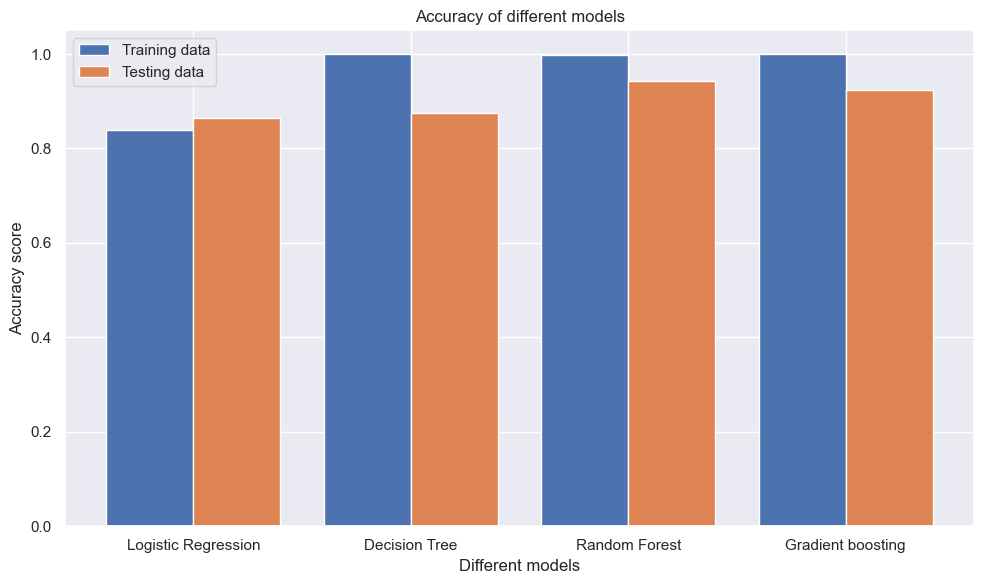

In [50]:
#Accuracy of logistic regression
Lr_train=accuracy_score(y_train, model.predict(X_train))
Lr_test=accuracy_score(y_test, model.predict(X_test))
#Accuracy of Decision Tree Classifier
Dt_train=accuracy_score(y_train,Dmodel.predict(X_train))
Dt_test=accuracy_score(y_test,Dmodel.predict(X_test))
#Accuracy of Random Forest Classifier
Rf_train=accuracy_score(y_train, Rmodel.predict(X_train))
Rf_test=accuracy_score(y_test, Rmodel.predict(X_test))
#Accuracy of Gradient Boosting
Gb_train=accuracy_score(y_train, Gmodel.predict(X_train))
Gb_test=accuracy_score(y_test, Gmodel.predict(X_test))

categories = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient boosting']
training  = [Lr_train, Dt_train, Rf_train, Gb_train]  # The accuracy on the training data
testing= [Lr_test, Dt_test, Rf_test, Gb_test] #the accuracy on the testing data

# Settingthe positions for the bars
x = list(range(len(categories)))
x1 = [pos - 0.2 for pos in x]  # Position for the first set of bars
x2 = [pos + 0.2 for pos in x]  # Position for the second set of bars

# Creatinge figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Plottng the bar graph
ax.bar(x1, training, width=0.4, align='center', label='Training data')
ax.bar(x2, testing, width=0.4, align='center',label='Testing data')

# Setting labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Different models')
ax.set_ylabel('Accuracy score')
ax.set_title('Accuracy of different models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
    
- The graphs above illustrates that both the training accuracy is higher than the testing data.it suggests a potential issue with overfitting. Overfitting occurs when a model learns to perform extremely well on the training data, but this performance doesn't extend well to new, unseen data.

- Decision tree, Random forest and Gradient boosting classifiers have the accuracy of 1 on the training data. it means these models are capable of fitting the training data perfectly. This could be due to their inherent complexity or because the models have grow too deep during training.

- Moreover, The difference between training accuracy and testing accuracy is more than 0.15 for a decision tree, the difference between training accuracy and testing accuracy is more than 0.08 for a random forest classifier and the difference between training accuracy and testing accuracy is more than 0.11 for a Gradient boosting classifier. 

- Meanwhile, the difference between the training accuracy and testing accuracy is less than 0.02 on Logistic regression.Though the accuracy score is less than those of other models, this is the best model since it doesn't show the sign for overfitting. This model is able to perform well on both the training data and testing data.


# 8. PREDICTING ON TEST DATA
<a id="eight"></a>
<a href=#cont>Back to Table of Contents</a>

**8.1 FUNCTION FOR PROCESSING DATA AND PREDICTING ATTRITION**

In [51]:
def attrition_prediction(path):
    #Load data into a dataframe
    df=pd.read_csv(path)

    #Copy of the dataframe
    DF=df.copy()

    #Drop the columns not used for the model
    drop_columns=['MonthlyIncome','PercentSalaryHike', 'JobLevel', "YearsAtCompany", 'YearsWithCurrManager',"EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"]
    df.drop(columns=drop_columns, inplace=True)
  
    Obj= ['BusinessTravel','Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

    for i in Obj:
        ordinal_encoder = OrdinalEncoder()
        df[[i]] = ordinal_encoder.fit_transform(df[[i]])

    X=df

    #Encoding 
    X=pd.get_dummies(df, drop_first=True)

    #Predict attrition
    DF['Attrition']= model.predict(X)

    return DF


In [52]:
import pickle
# Save the model to a file using pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)

**8.2 DATAFRAME WITH THE PREDICTED ATTRITION**

In [53]:
test=attrition_prediction('test.csv')
test


Age     BusinessTravel  DailyRate              Department  \
0     34      Travel_Rarely        790                   Sales   
1     35      Travel_Rarely        660                   Sales   
2     24  Travel_Frequently        381  Research & Development   
3     24         Non-Travel        830                   Sales   
4     44  Travel_Frequently       1193  Research & Development   
..   ...                ...        ...                     ...   
407   36  Travel_Frequently        884  Research & Development   
408   39      Travel_Rarely        613  Research & Development   
409   27      Travel_Rarely        155  Research & Development   
410   49  Travel_Frequently       1023                   Sales   
411   34      Travel_Rarely        628  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
0                  24          4        Medical              1   
1                   7          1  Life Sciences              1   
2                   9          3        Medical              1   
3                  13          2  Life Sciences              1   
4                   2          1        Medical              1   
..                ...        ...            ...            ...   
407                23          2        Medical              1   
408                 6          1        Medical              1   
409                 4          3  Life Sciences              1   
410                 2          3        Medical              1   
411                 8          3        Medical              1   

     EmployeeNumber  EnvironmentSatisfaction  ... StandardHours  \
0              1489                        1  ...            80   
1              1492                        4  ...            80   
2              1494                        2  ...            80   
3              1495                        4  ...            80   
4              1496                        2  ...            80   
..              ...                      ...  ...           ...   
407            2061                        3  ...            80   
408            2062                        4  ...            80   
409            2064                        2  ...            80   
410            2065                        4  ...            80   
411            2068                        2  ...            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                   0                 16                      2   
1                   1                  1                      3   
2                   0                  4                      2   
3                   1                  1                      2   
4                   0                 16                      2   
..                ...                ...                    ...   
407                 1                 17                      3   
408                 1                  9                      5   
409                 1                  6                      0   
410                 0                 17                      3   
411                 0                  6                      3   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                 4              15                  9   
1                 3               1                  0   
2                 2               0                  0   
3                 3               1                  0   
4                 2               2                  2   
..              ...             ...                ...   
407               3               5                  2   
408               3               7                  7   
409               3               6                  2   
410               2               9                  6   
411               4               4                  3   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                         10                    

**8.3 GRAPH SHOWING ATTRITION PREDICTION**

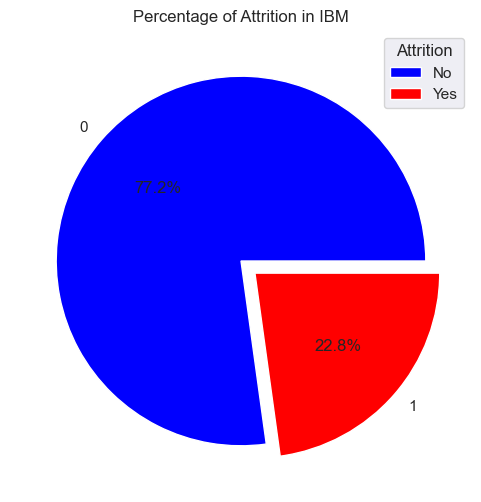

In [54]:
# A dataframe with value counts of Attrition
Attrition = pd.Series(test['Attrition'].value_counts())

# Creating a DataFrame for the pie chart
attrition_df = pd.DataFrame({'Count': Attrition.values}, index=Attrition.index)

# Define the colors and explode for the pie chart
colors = ['blue', 'red']
explode = (0, 0.1)

# plotting pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set_palette(colors)
plt.pie(attrition_df['Count'], labels=attrition_df.index, autopct="%0.1f%%", explode=explode, radius=1)
plt.title("Percentage of Attrition in IBM")
labels = ['No', 'Yes']
plt.legend(title="Attrition", labels=labels, loc="best")

plt.show()

**Observation**

- from the 412 employees on the testing data, 13.3% are predicted that they will leave IBM.